# **HELPING NOTES**
Note :
    
    1. During the model build stage we only use train data as we are training the data at that time [i.e. X_train_modelName, y_train_modelName] 
    
    2. After Building Model, We mainly work on testing 
    
    3. first we will use target variable test (X variable ) to predict the predicted variable (y Variable) [i.e. using X_test_model_name we get y_predicted]
    
    4. Now During metrics evaluation we compare the y_test data which is the actual data with y_predicted one which is the predicted data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
data = pd.read_csv("ai_assistant_usage_student_life.csv")
data.head(5)

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [23]:
data.dtypes

SessionID              object
StudentLevel           object
Discipline             object
SessionDate            object
SessionLengthMin      float64
TotalPrompts            int64
TaskType               object
AI_AssistanceLevel      int64
FinalOutcome           object
UsedAgain                bool
SatisfactionRating    float64
dtype: object

In [24]:
data.describe()

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.846467,5.607500,3.479500,3.417780
std,13.897302,4.648764,0.991805,1.143331
min,0.030000,1.000000,1.000000,1.000000
25%,9.630000,2.000000,3.000000,2.600000
50%,16.650000,4.000000,4.000000,3.500000
75%,26.670000,8.000000,4.000000,4.400000
max,110.810000,39.000000,5.000000,5.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [26]:
data.isnull().sum()

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

In [27]:
data.duplicated().sum()

np.int64(0)

# PreProcessing and EDA

In [28]:
from sklearn.preprocessing import LabelEncoder

df_clean = data.drop(columns=["SessionID","SessionDate"])

label_encode = {}

for col in df_clean.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])

print(df_clean.head())

   StudentLevel  Discipline  SessionLengthMin  TotalPrompts  TaskType  \
0             2           2             31.20            11         4   
1             2           6             13.09             6         4   
2             2           1             19.22             5         1   
3             2           2              3.70             1         1   
4             2           6             28.12             9         5   

   AI_AssistanceLevel  FinalOutcome  UsedAgain  SatisfactionRating  
0                   2             0       True                 1.0  
1                   3             0       True                 2.0  
2                   3             0       True                 3.3  
3                   3             0       True                 3.5  
4                   3             0       True                 2.9  


# Data Preprocessing Summary
    1 Dropped non-informative columns: SessionID, SessionDate

    2 Encoded categorical columns: StudentLevel, Discipline, TaskType, FinalOutcome, etc.

    3 No missing values found – dataset is clean and ready for modeling.

# 1️⃣ Linear Regression
**🎯 Goal: Predict SatisfactionRating based on session data.**

C:\Users\LOQ\AppData\Local\Temp\ipykernel_39364\559841761.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


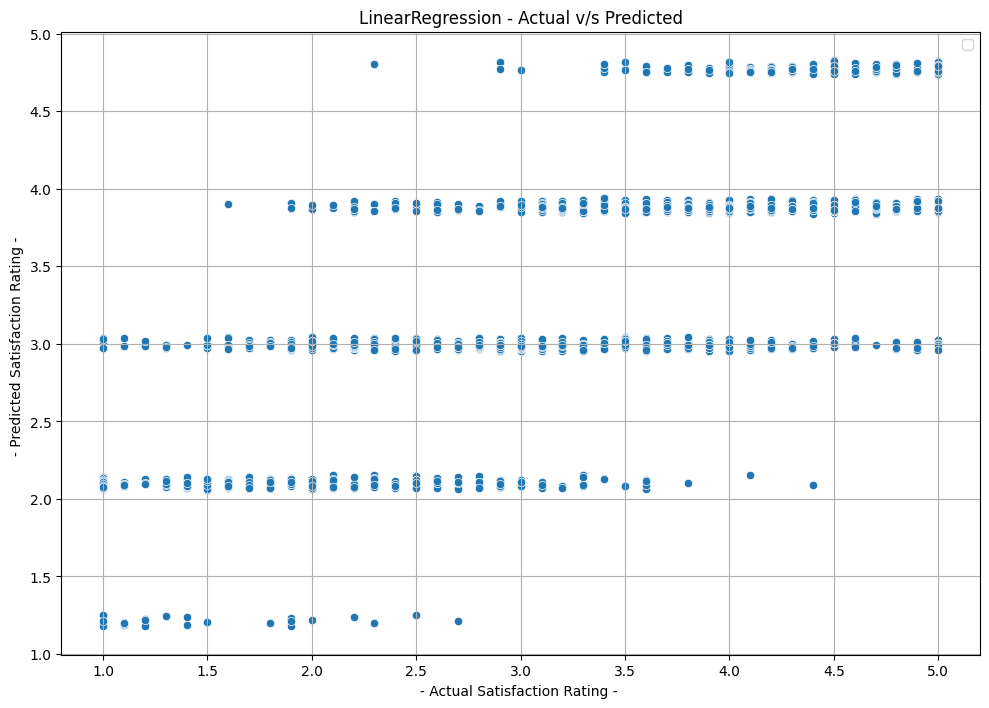

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

# Defining features and Target for linear regression
X_linear = df_clean.drop(columns=["SatisfactionRating"])
y_linear =  df_clean["SatisfactionRating"]

# Spliting into train and test - 80% testing and 20% will be trained
X_linear_train, X_linear_test, y_linear_train, y_linear_test = train_test_split(X_linear,y_linear,test_size =0.2,random_state = 42)

# Training Linear Regression model
linearReg = LinearRegression()
linearReg.fit(X_linear_train,y_linear_train)

# Predictions from Model
y_linear_Pred = linearReg.predict(X_linear_test)

# Evaluation Metric
mse = mean_squared_error(y_linear_test,y_linear_Pred)
r2 = r2_score(y_linear_test,y_linear_Pred)

# visualize
plt.figure(figsize=(10,7))
sns.scatterplot(x = y_linear_test,y=y_linear_Pred)
plt.xlabel("- Actual Satisfaction Rating - ")
plt.ylabel("- Predicted Satisfaction Rating - ")
plt.tight_layout()
plt.title("LinearRegression - Actual v/s Predicted")
plt.grid(True)
plt.legend()
plt.show()


# 📈 Linear Regression Results
**Mean Squared Error (MSE): ~0.51**

**R² Score: 0.61**

# ✅ Interpretation:

    The model explains about 61% of the variation in student satisfaction using features like task type, session length, and AI help level.

    The scatter plot shows that most predictions are close to actual ratings, though some variability exists.

# 2️⃣ Logistic Regression

**🎯 Goal: Predict whether the student will reuse the AI assistant (UsedAgain: True/False)**



c:\Users\LOQ\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LOQ\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LOQ\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Report 
                precision  recall  f1-score    support
0              0.000000  0.0000  0.000000   615.0000
1              0.692500  1.0000  0.818316  1385.0000
accuracy       0.692500  0.6925  0.692500     0.6925
macro avg      0.346250  0.5000  0.409158  2000.0000
weighted avg   0.479556  0.6925  0.566684  2000.0000 


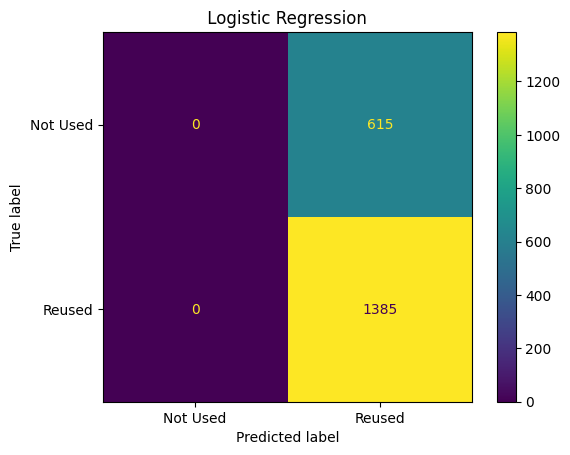

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

# Define target
X_log = df_clean.drop(columns=["UsedAgain"])
y_log = df_clean["UsedAgain"].astype(int)  #converting bool to int (True = 1 ,False = 0)

# Split and Train data
X_log_train, X_log_test, y_log_train,y_log_test = train_test_split( X_log,
                                                                    y_log,
                                                                   test_size = 0.2,
                                                                   random_state = 42
                                                                   )

# Build Model
log_regression = LogisticRegression()
log_regression.fit(X_log_train, y_log_train)

# Making predictions and Evaluations
y_log_predict = log_regression.predict(X_log_test)
cm = confusion_matrix(y_log_test,y_log_predict)
report = classification_report(y_log_test , y_log_predict , output_dict=True )


print(f"Report \n  {pd.DataFrame(report).T} ")

# Visualize 
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not Used", "Reused"]).plot()
plt.title(" Logistic Regression ")
plt.show()
#pd.DataFrame(report).T

# ⚠️ Logistic Regression Results (for UsedAgain)
    Accuracy: 69.25%

    Precision/Recall (class 1 – Reused): Very high (100% recall)

    Precision/Recall (class 0 – Not reused): 0% → model never predicted "Not Reused"

# 📌 Interpretation:

    The model is biased towards predicting that every student reused the AI.

    This indicates a class imbalance in the data – most students reused the assistant, so the model overfits to that.

# 3️⃣ KMeans Clustering
*🎯 Unsupervised grouping of session types based on features.*

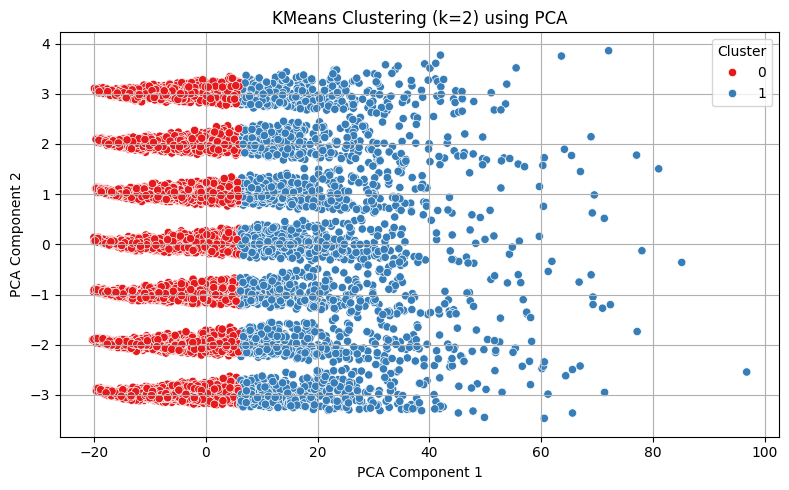

In [44]:
from sklearn.cluster import KMeans
from sklearn.decomposition  import PCA

# target
X_cluster = df_clean.drop(columns=["UsedAgain", "SatisfactionRating"])

# Applyingh K-MEANS
kmeans = KMeans(n_clusters = 2)
cluster = kmeans.fit_predict(X_cluster)

# Reduce to 2D for visuals
pca =PCA(n_components =2)
reduce = pca.fit_transform(X_cluster)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=reduce[:, 0], y=reduce[:, 1], hue=cluster, palette="Set1")
plt.title("KMeans Clustering (k=2) using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


# 4️⃣ K-Nearest Neighbors (KNN)
**🎯 Predict whether a student will reuse AI assistant.**

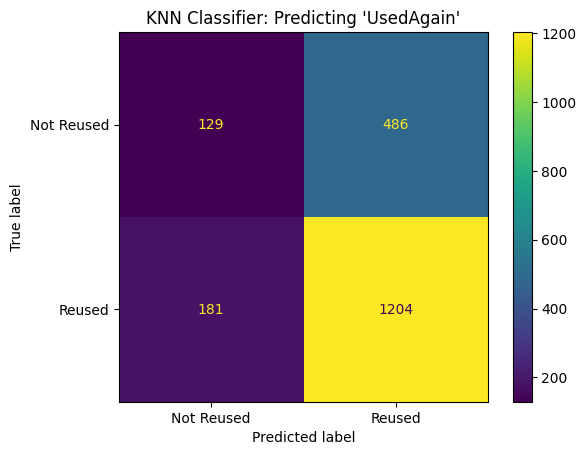

              precision    recall  f1-score    support
0              0.416129  0.209756  0.278919   615.0000
1              0.712426  0.869314  0.783089  1385.0000
accuracy       0.666500  0.666500  0.666500     0.6665
macro avg      0.564278  0.539535  0.531004  2000.0000
weighted avg   0.621315  0.666500  0.628057  2000.0000


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

# define target
X_knn = df_clean.drop(columns=["UsedAgain"])
y_knn = df_clean["UsedAgain"].astype(int)

# Train and Test data
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)


# Build Model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_knn,y_train_knn)

# Predictions and Metrics evaluation
y_Pred_knn = knn.predict(X_test_knn) 
cm_knn = confusion_matrix(y_test_knn,y_Pred_knn)
report_knn = classification_report(y_test_knn, y_Pred_knn, output_dict=True)

# Visualize confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["Not Reused", "Reused"]).plot()
plt.title("KNN Classifier: Predicting 'UsedAgain'")
plt.show()
print(f"{pd.DataFrame(report_knn).T}")

